
# **Read in Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("IMDB.csv")
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **About Data**

In [4]:
data.shape

(50000, 2)

In [5]:
data.shape

(50000, 2)

In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

After reading the dataset which contains 50k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being sentiment which contains NEGATIVE and POSITIVE.

# **Working With Label**


In [7]:
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

In [8]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [9]:

data['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

<Axes: >

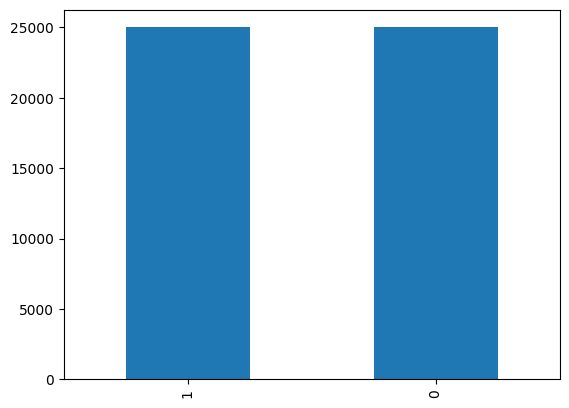

In [10]:
data['sentiment'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'sentiment distribution')

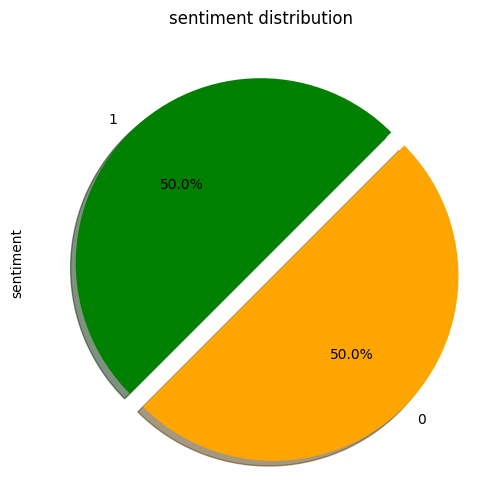

In [11]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('sentiment distribution')

# **Working With Text**

In [12]:
data['review'][999]

"This is like a zoology textbook, given that its depiction of animals is so accurate. However, here are a few details that appear to have been slightly modified during the transition to film:<br /><br />- Handgun bullets never hit giant Komodo dragons. It doesn't matter how many times you shoot at the Komodo, bullets just won't go near it.<br /><br />- The best way to avoid being eaten by a giant Cobra, or a giant Komodo dragon, is just to stand there. The exception to this rule is if you've been told to stay very still, in which case you should run off, until the Komodo is right next to you, and then you should stand there, expecting defeat.<br /><br />- Minutes of choppy slow motion footage behind the credits really makes for enjoyable watching.<br /><br />- $5,000 is a memory enhancement tool, and an ample substitute for losing your boating license/getting arrested.<br /><br />- Members of elite army units don't see giant Komodo dragons coming until they are within one metre of the 

# **Cleaning steps**

removing HTML Tags

extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a given text.

removing special chars,puntuation,sumbols

lower casing

removing stopwords

tokenization

---



In [13]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [16]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [17]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [18]:
data['review'] = data['review'].apply(lambda x: preprocessing(x))

In [19]:
data['review'][999]

'like zoolog textbook given depict anim accur howev detail appear slightli modifi transit film handgun bullet never hit giant komodo dragon matter mani time shoot komodo bullet go near best way avoid eaten giant cobra giant komodo dragon stand except rule told stay still case run komodo right next stand expect defeat minut choppi slow motion footag behind credit realli make enjoy watch 5 000 memori enhanc tool ampl substitut lose boat licens get arrest member elit armi unit see giant komodo dragon come within one metr size be mayb comput gener natur dragon someth film news stori aim expos illeg anim test report cameraman one camera gear personnel need sound gear second camera microphon etc superflu hear loud anim scream one person gun take point nearest person take gun sound safeti taken made even finger nowher near safeti report agre go half way around world order expos someth without faintest idea expos background research vagu knowledg fashion modern journal handgun hold least 52 bu

In [20]:
  data['review']

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

# **Visualizing Negative and Positive Words**

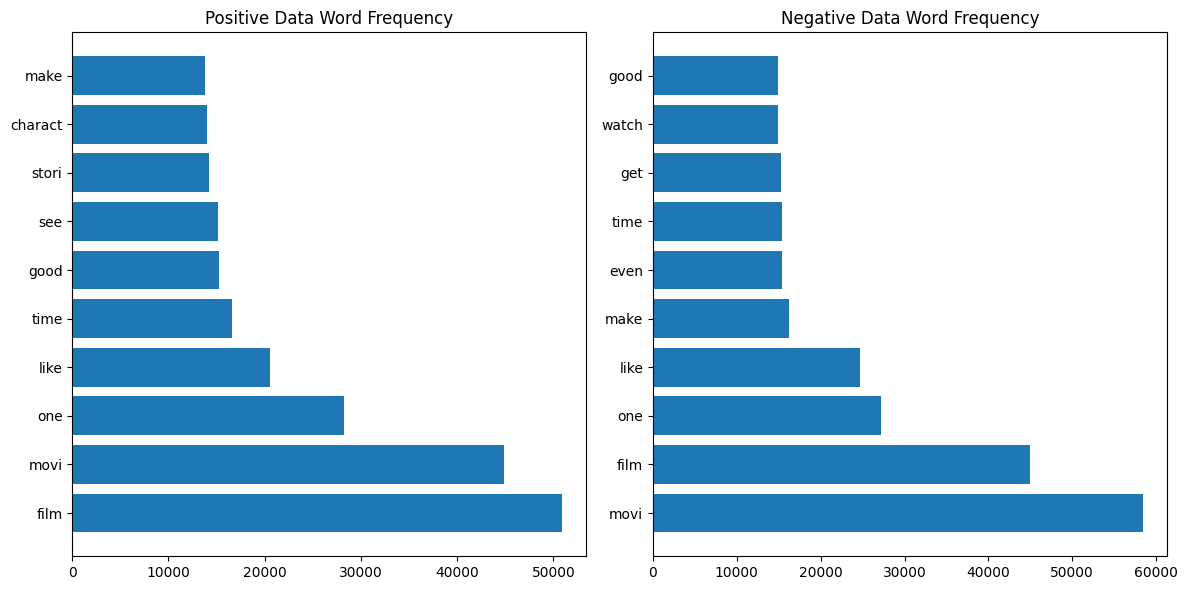

In [21]:
positivedata = data[data['sentiment'] == 1]
positivedata = positivedata['review']
negdata = data[data['sentiment'] == 0]
negdata = negdata['review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

# **TF-IDF Vertorizer to convert the raw documents into feature matrix**

# **Training Machine Learning Model for Sentiment Analysis**

Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, make_scorer

# # Load your preprocessed data
# data = pd.read_csv('IMDB.csv')  # Replace 'preprocessed_data.csv' with your preprocessed dataset filename

# # Assuming you have 'review' column containing preprocessed text data and 'sentiment' column with labels
X = data['review']
y = data['sentiment']

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Perform cross-validation for each classifier
for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name}:")
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring=make_scorer(accuracy_score))
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean()}\n")

# Train and evaluate the best performing model
best_classifier_name = max(classifiers, key=lambda k: cv_scores.mean())
best_classifier = classifiers[best_classifier_name]
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best performing model: {best_classifier_name}")
print(f"Accuracy on test set: {accuracy}")


Evaluating Logistic Regression:
Cross-validation scores: [0.8905 0.8907 0.886  0.8843 0.8842]
Average Accuracy: 0.8871400000000002

Evaluating Support Vector Machine:
Cross-validation scores: [0.8897 0.8882 0.8842 0.8815 0.8852]
Average Accuracy: 0.88576

Evaluating Random Forest:
Cross-validation scores: [0.8508 0.8511 0.847  0.8478 0.8453]
Average Accuracy: 0.8484

Evaluating Gradient Boosting:
Cross-validation scores: [0.8198 0.8172 0.8081 0.8137 0.8118]
Average Accuracy: 0.81412

Evaluating Naive Bayes:
Cross-validation scores: [0.8547 0.8557 0.851  0.8426 0.8517]
Average Accuracy: 0.85114

Best performing model: Logistic Regression
Accuracy on test set: 0.8861


# **Accuracy**

In [25]:
print(f"Accuracy on test set: {accuracy}")


Accuracy on test set: 0.8861


In [26]:
import pickle
pickle.dump(best_classifier,open('best_classifier.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [35]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = vectorizer.transform(comment_list)
    prediction = best_classifier.predict(comment_vector)[0]
    return prediction






In [36]:
predict = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')
if predict == 1:
    print("positive comment")
else:
    print("negative comment")

positive comment


In [ ]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [40]:
predict=prediction("S&P BSE 500 index collapsed by over 620 points or 2% to end Tuesday’s session at 30,370. Zee Entertainment Enterprises (ZEEL) was the top loser in the pack as it tanked 33% to the day’s low of Rs 152.50. It was followed by Ircon International, Prestige Estates, HUDCO, RITES and Network18 Media & Investments which also fell in double digits of up to 14% The index hit a low of 30,298.09 after opening with a 200-point lead. At close, 426 stocks were in red, 73 in the green while one ..")
if predict == 1:
    print("positive comment")
else:
    print("negative comment")


negative comment
